In [38]:
#Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
#Loading the csv file in dataframe and having a look at it
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
#Display information about the datatypes and the number of data points in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [41]:
#To check if there is any missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [42]:
#To understand the co-relation between the columns in datafram
df.corr()
#It can be noticed that cgpa and GRE score have a good numerical value in terms of co-relation with the column chance of admit.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

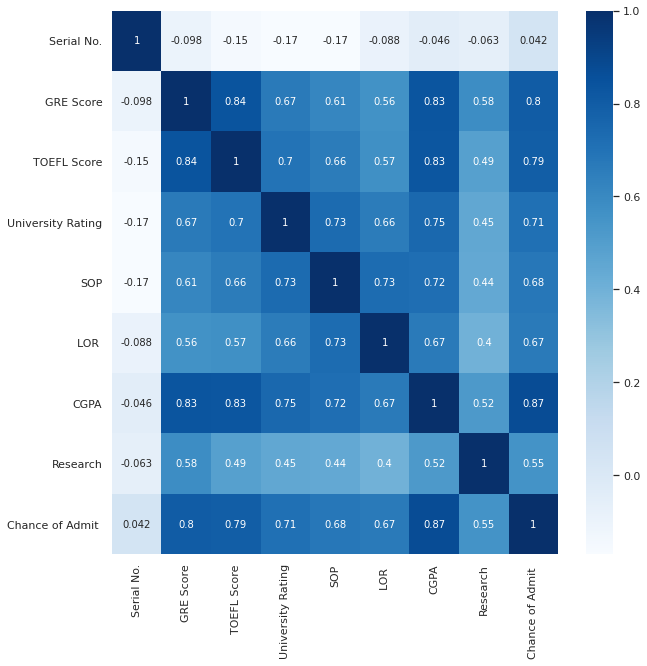

In [43]:
#Displaying the above co-relation output in terms of heat map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Text(0, 0.5, 'GRE Score')

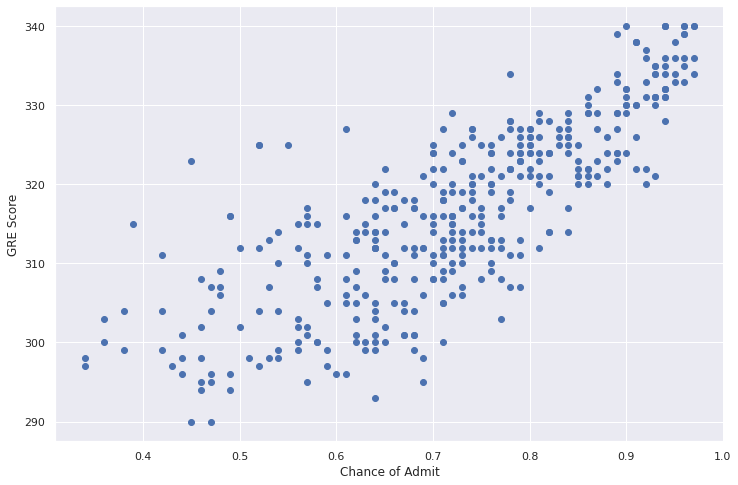

In [44]:
#Plotting a scatter plot between the chance of admit and GRE score for graphical analysis
plt.subplots(figsize=(12,8))
plt.scatter(df['Chance of Admit '],df['GRE Score'])
plt.xlabel("Chance of Admit")
plt.ylabel("GRE Score")

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

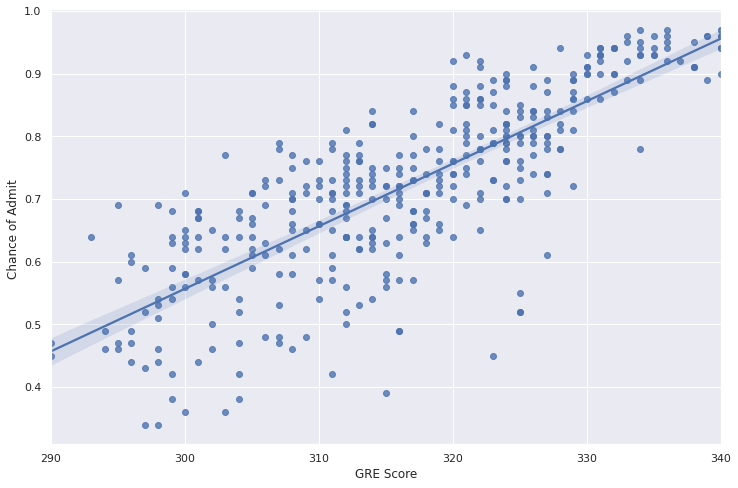

In [45]:
#Plotting a linear regression line between the chance of admit and GRE score
plt.subplots(figsize=(12,8))
sns.regplot(x=df['GRE Score'],y=df['Chance of Admit '],data=df)

/home/jaineel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

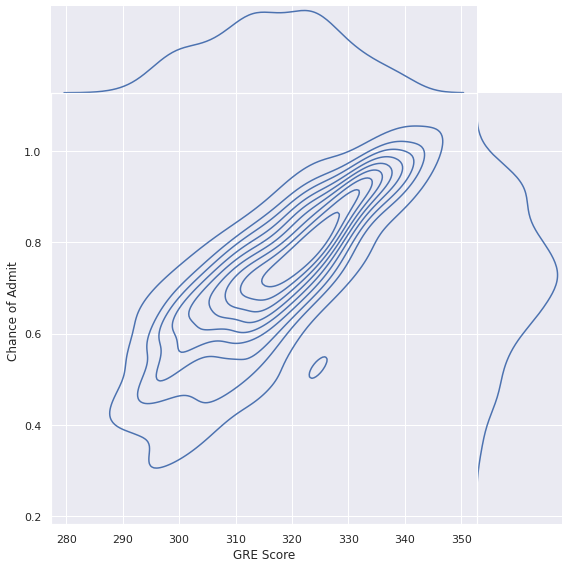

In [46]:
#Plotting a joint plot kind of kernel density plot between the chance of admit and GRE score
sns.jointplot(df['GRE Score'],df['Chance of Admit '],kind='kde',height=8,space=0)
plt.plot(figsize=(12,8))

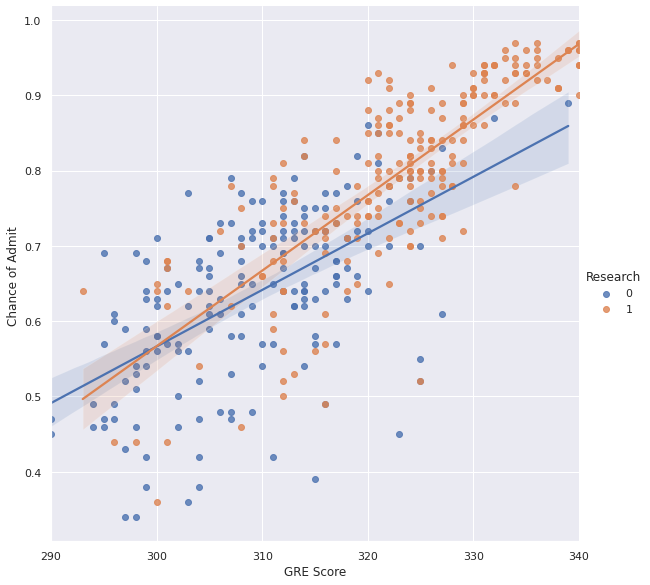

In [47]:
#Plotting lmplot between Gre Score and Chance of Admit along with one more parameter Research
sns.lmplot(x="GRE Score",y="Chance of Admit ",data=df,hue="Research",height=8)

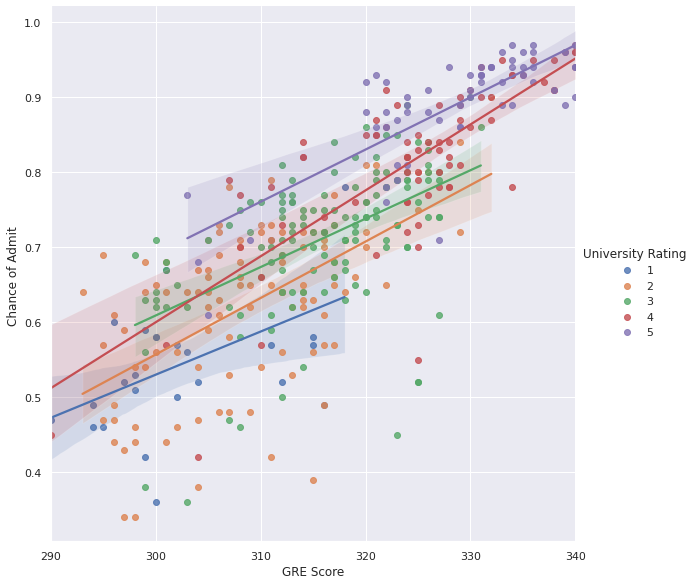

In [48]:
#Plotting lmplot between Gre Score and Chance of Admit along with one more parameter university rating
sns.lmplot(x="GRE Score",y="Chance of Admit ",data=df,hue="University Rating",height=8)

In [49]:
# Observations from both the above lmpots states tha
#-- Candidates having more research experience have high chance of admit
#-- Candidates having high gre scores have good chance of getting admit into higher rating universities
#-- A low gre score has low chance of admission that too for universities with low rating

In [50]:
# Lets consider the chance of admit being 0.8 or higher and check how important are gre scores
admit_high_chance = df[df['Chance of Admit '] >= 0.8]
admit_high_chance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         128 non-null    int64  
 1   GRE Score          128 non-null    int64  
 2   TOEFL Score        128 non-null    int64  
 3   University Rating  128 non-null    int64  
 4   SOP                128 non-null    float64
 5   LOR                128 non-null    float64
 6   CGPA               128 non-null    float64
 7   Research           128 non-null    int64  
 8   Chance of Admit    128 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 10.0 KB


In [51]:
#Checking the correlation of GRE score and admit chance which comes out to be pretty decent
admit_high_chance.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.140435,-0.223184,-0.211793,-0.088391,-0.141164,-0.220561,-0.031246,-0.227214
GRE Score,-0.140435,1.000000,0.722463,0.358013,0.320138,0.246629,0.754434,0.167532,0.716187
TOEFL Score,-0.223184,0.722463,1.000000,0.274811,0.337175,0.302047,0.648308,0.083921,0.673774
University Rating,-0.211793,0.358013,0.274811,1.000000,0.584860,0.531448,0.479284,0.190083,0.584556
SOP,-0.088391,0.320138,0.337175,0.584860,1.000000,0.601405,0.519791,0.148911,0.565463
LOR,-0.141164,0.246629,0.302047,0.531448,0.601405,1.000000,0.441634,0.050772,0.488480
CGPA,-0.220561,0.754434,0.648308,0.479284,0.519791,0.441634,1.000000,0.158186,0.871533
Research,-0.031246,0.167532,0.083921,0.190083,0.148911,0.050772,0.158186,1.000000,0.226028
Chance of Admit,-0.227214,0.716187,0.673774,0.584556,0.565463,0.488480,0.871533,0.226028,1.000000


/home/jaineel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

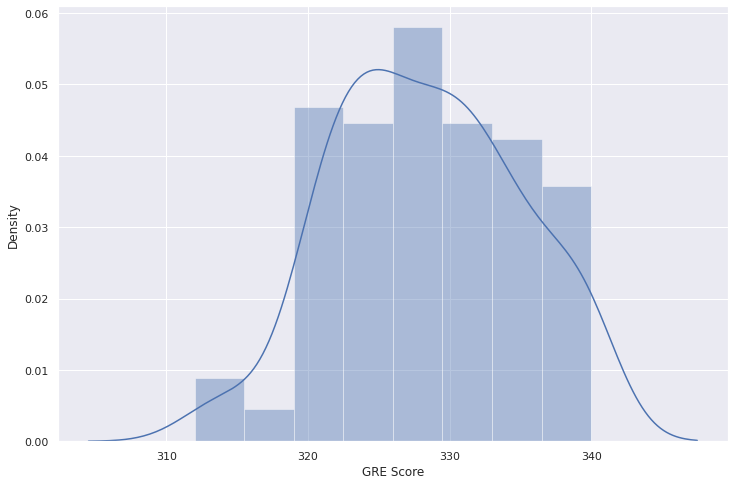

In [52]:
#Plotting the distribution of GRE score
plt.subplots(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.distplot(admit_high_chance['GRE Score'])

/home/jaineel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

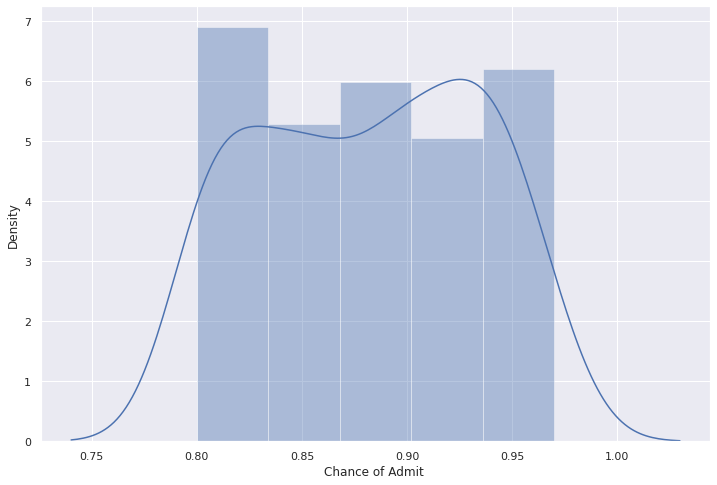

In [53]:
#Plotting the distribution of Chance of admit
plt.subplots(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.distplot(admit_high_chance['Chance of Admit '])

In [54]:
#Points from above graphs
#-- For a higher chance of admission the GRE score is also high
#-- Maximum GRE scores are in the range of 320-340

In [55]:
#Predicting the Chance of admit using GRE score and apply liner regression ML algorithm on this dataset
X = df['GRE Score'].values
#Bringing the GRE score in range of 1
X = X/340
y = df['Chance of Admit '].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [58]:
#Spliting the dataset into test and train dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [59]:
#Importing the linear regression model and creating its object
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [60]:
#Training the model on the training data
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [61]:
#Predicitng the values
y_pred = lr.predict(X_test.reshape(-1,1))

In [62]:
#Checking the accuracy of the model in terms of model score
lr.score(X_test.reshape(-1,1),y_test.reshape(-1,1))

0.5860141540067845

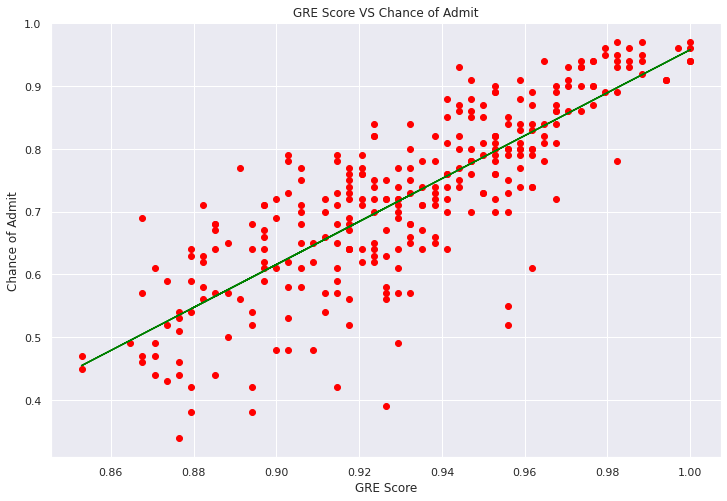

In [64]:
#Plotting the graph on trained dataset
plt.subplots(figsize=(12,8))
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lr.predict(X_train.reshape(-1,1)),color='green')
plt.title("GRE Score VS Chance of Admit")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.show()

In [69]:
#Predicitng the chance of admit with sample test case
test = 320
val = 320/340
val_out = lr.predict(np.array([[val]]))
print("Chance of admission:", val_out[0])

Chance of admission: 0.7566256502367277


In [70]:
#Using RandomForest ML algorithm to create a model and apply it on all the columns for prediciton
x = df.drop(['Chance of Admit ','Serial No.'],axis=1)
y = df['Chance of Admit ']

In [71]:
#Spliting the dataset into test and training dataset
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=7)

In [72]:
#Importing the random forest model and creating its object
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2,random_state=0, n_estimators=5)

In [73]:
#Training the model and checking the model score
regr.fit(X_train,y_train)
regr.score(X_test,y_test)

0.6901443456671795

In [75]:
#Checking the model with sample input
val = regr.predict([[325,100,3,4.1,3.7,7.67,1]])
per_val = (val[0])*100
print("The chances of Admit are :",per_val)

The chances of Admit are : 54.47694678499888


In [ ]:
#Therefore the model comprised of EDA skills and prediction using Machine Learning algorithms.